# Vertical Line Test

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

Text(0.5,1,'Does not pass the vertical line test.')

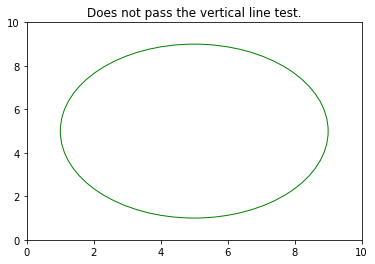

In [2]:
circle = plt.Circle((5, 5), 4, color='green', fill=False)
ax = plt.gca()
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.add_artist(circle)
ax.set_title("Does not pass the vertical line test.")

Passes the vertical line test


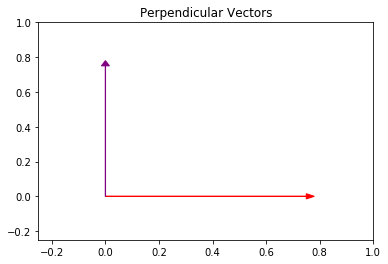

In [3]:
print("Passes the vertical line test")

fig = plt.figure()
plt.arrow(0,0,.75,0, head_width=0.03, head_length=0.03, color="red")
plt.arrow(0,0,0,.75, head_width=0.03, head_length=0.03, color="purple")

plt.xlim(-.25,1)          
plt.ylim(-.25,1)
plt.title("Perpendicular Vectors")
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because a function cannot have more than one output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only one where every input has exactly one output. 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

\begin{align}
m's \  3 \ dimensions \ become \ 3 \ new\  dimensions
\\
n's \  4 \ dimensions \ become \ 2 \ new\  dimensions
\end{align}

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.


\begin{align}
O(𝑥_1,x_2)=(x_1, x_2^2, x_1^3+x_2)
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
T_p (3,4) = \begin{bmatrix} 1&3\\-1&2  \end{bmatrix}
\\
\\
T_q = \begin{bmatrix} 4&1&2\\-1&2&3\\5&1&-2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [4]:
p = np.array([72,15])
tp = np.array([[1,3],[-1,2]])

traditional = np.array([p[0]+3*p[1],2*p[1]-p[0]])
vmMultiplication = np.matmul(tp, p)

print(f"Input: \n{p}")
print(f"Traditional Style: \n{traditional}")
print(f"Vector-Matrix Multiplication: \n{vmMultiplication}")

Input: 
[72 15]
Traditional Style: 
[117 -42]
Vector-Matrix Multiplication: 
[117 -42]


In [5]:
q = np.array([72,15,25])
tp = np.array([[4,1,2],[-1,2,3],[5,1,-2]])

traditional = np.array([
    q[0]*4+q[1]+q[2]*2,
    -q[0]+q[1]*2+q[2]*3,
    q[0]*5+q[1]-q[2]*2])

vmMultiplication = np.matmul(tp, q)

print(f"Input: \n{q}")
print(f"Traditional Style: \n{traditional}")
print(f"Vector-Matrix Multiplication: \n{vmMultiplication}")

Input: 
[72 15 25]
Traditional Style: 
[353  33 325]
Vector-Matrix Multiplication: 
[353  33 325]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

The eigenvector is the maximum variance of the data and the eigenvector is the orthagonal dimension. In PCA this allows us to select an optimal plane for projection/decomposition.  

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?



1.   Difficult to visualize.
2.   Difficult to easily identify the optimal perspective for viewing.
3.   Takes longer to process calculations?



## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Pretty sure Ryan said 5. 

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
one_hot = pd.get_dummies(df['species'])
species = df['species']
df = df.drop('species',axis = 1)
df = df.join(one_hot)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0


In [7]:
pca = PCA(n_components=2, svd_solver='full') # Need X & Y.n=2
pca.fit(df)
df_pca = pca.transform(df)

print(f"Components: \n  Principal axes in feature space, representing the directions of maximum variance in the data.\n{pca.components_}\n")  
print(f"Explained Variance: {pca.explained_variance_}\n  The amount of variance explained by each of the selected components.\n  Equal to n_components largest eigenvalues of the covariance matrix of X.\n")  
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}\n  Percentage of variance explained by each of the selected components.\n")  
print(f"Singular Values: {pca.singular_values_}\n  The singular values corresponding to each of the selected components. \n  The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.\n") 
print(f"Mean: {pca.mean_}\n")
print(f"Noise Variance: {pca.noise_variance_}")


Components: 
  Principal axes in feature space, representing the directions of maximum variance in the data.
[[ 0.34640334 -0.08128852  0.82678916  0.34693713 -0.20344324  0.0410278
   0.16241543]
 [-0.27401013 -0.44497924  0.07628506 -0.05816495 -0.27116629  0.6866787
  -0.41551241]]

Explained Variance: [4.53847908 0.3999893 ]
  The amount of variance explained by each of the selected components.
  Equal to n_components largest eigenvalues of the covariance matrix of X.

Explained Variance Ratio: [0.86605053 0.07632754]
  Percentage of variance explained by each of the selected components.

Singular Values: [26.00448776  7.72000032]
  The singular values corresponding to each of the selected components. 
  The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space.

Mean: [5.84333333 3.054      3.75866667 1.19866667 0.33333333 0.33333333
 0.33333333]

Noise Variance: 0.06039276701276386


In [8]:
df_final = pd.DataFrame(df_pca,columns=['A','B'])
df_final = df_final.join(species)
df_final.head(3)

,A,B,species
0,-2.793786,-0.387790,setosa
1,-2.822422,-0.110498,setosa
2,-2.990639,-0.152320,setosa


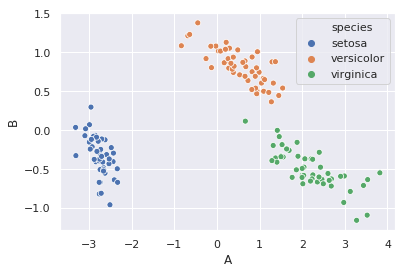

In [9]:
#!pip install seaborn --upgrade
import seaborn as sns; sns.set()
ax = sns.scatterplot(x="A", y="B", hue="species", data=df_final)

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Creepy AF Eigenfaces Photo](This photo is creepy https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)